In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("car_prices.csv")


In [37]:

df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')
df = df.dropna(subset=['sellingprice'])
df['sellingprice'] = df['sellingprice'].astype(int)
print(f"Rows after cleaning: {df.shape[0]}")
print(df[['sellingprice']].describe())

Rows after cleaning: 395489
        sellingprice
count  395489.000000
mean    13176.609653
std      9466.493723
min         1.000000
25%      6300.000000
50%     11900.000000
75%     17800.000000
max    230000.000000


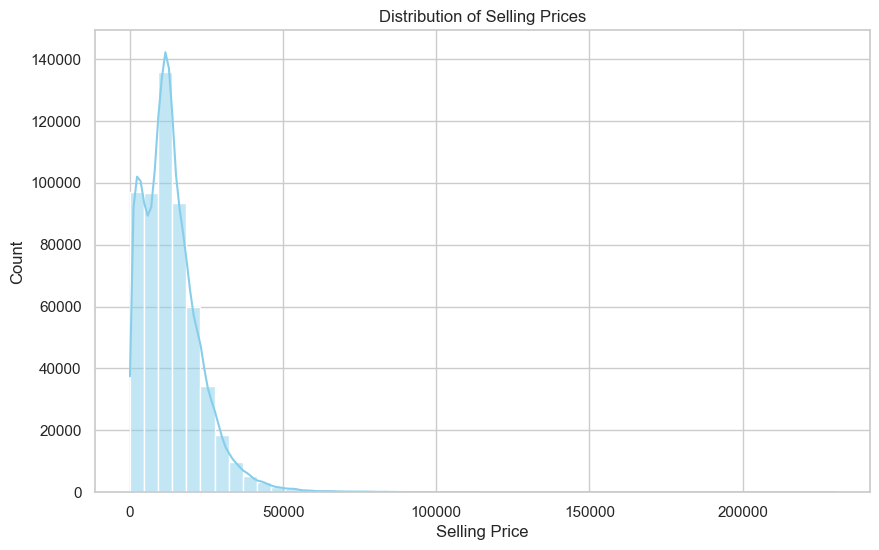

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sellingprice'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()


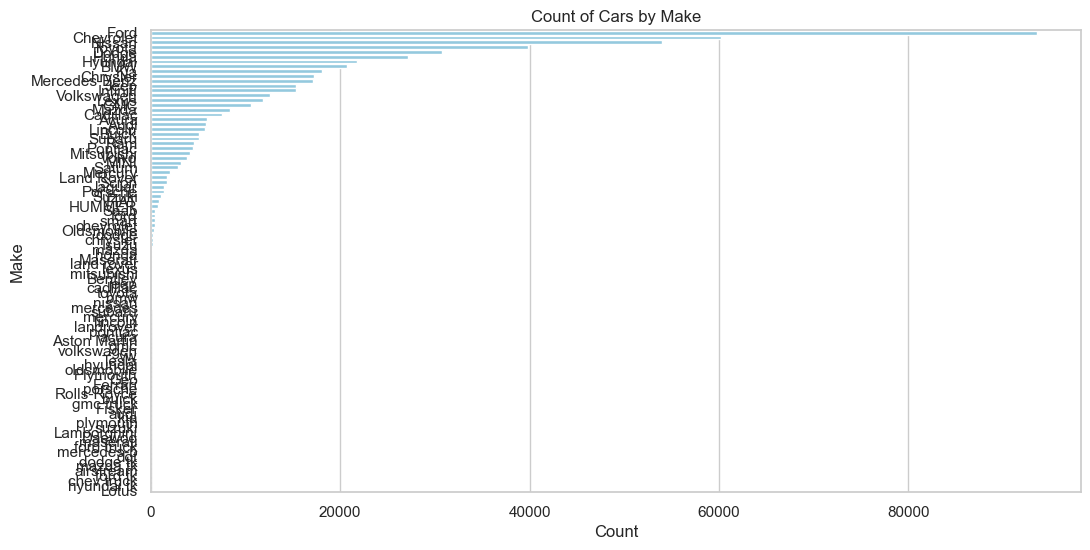

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y='make', data=df, order=df['make'].value_counts().index, color='skyblue')
plt.title('Count of Cars by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

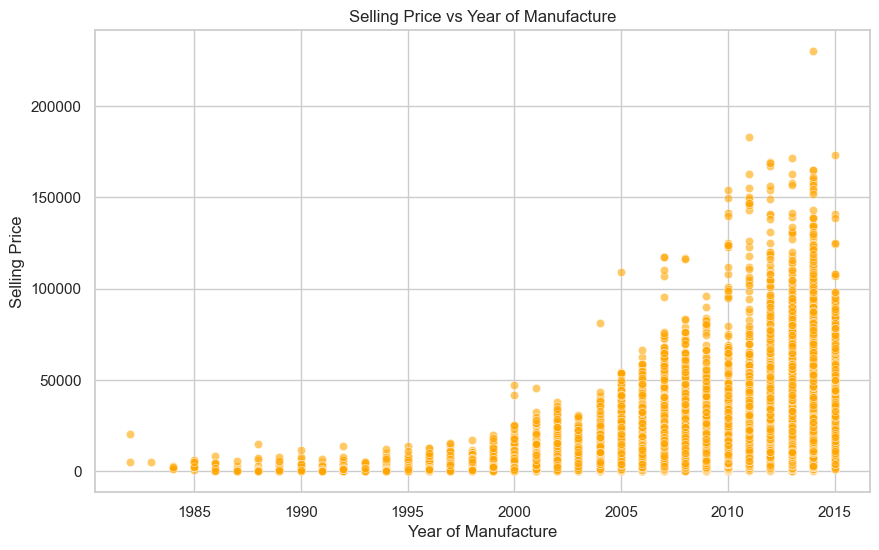

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='sellingprice', data=df, alpha=0.6, color='orange')
plt.title('Selling Price vs Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()

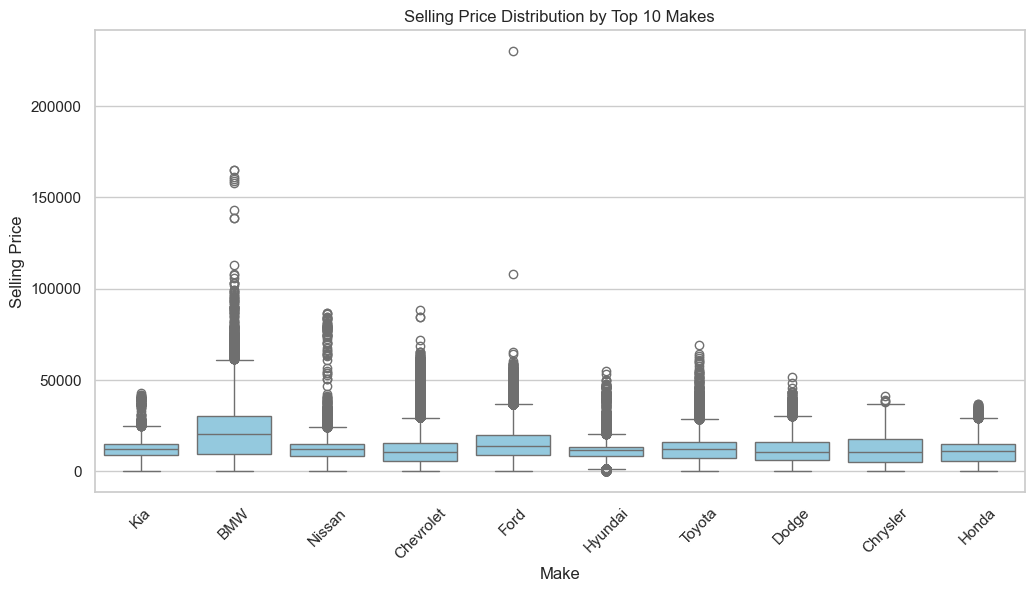

In [27]:
top_makes = df['make'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='sellingprice', data=df[df['make'].isin(top_makes)], color='skyblue')
plt.title('Selling Price Distribution by Top 10 Makes')
plt.xlabel('Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

In [35]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce').dt.tz_localize(None)
df = df.dropna(subset=['saledate'])
sales_over_time = df.groupby(df['saledate'].dt.to_period('M')).size()


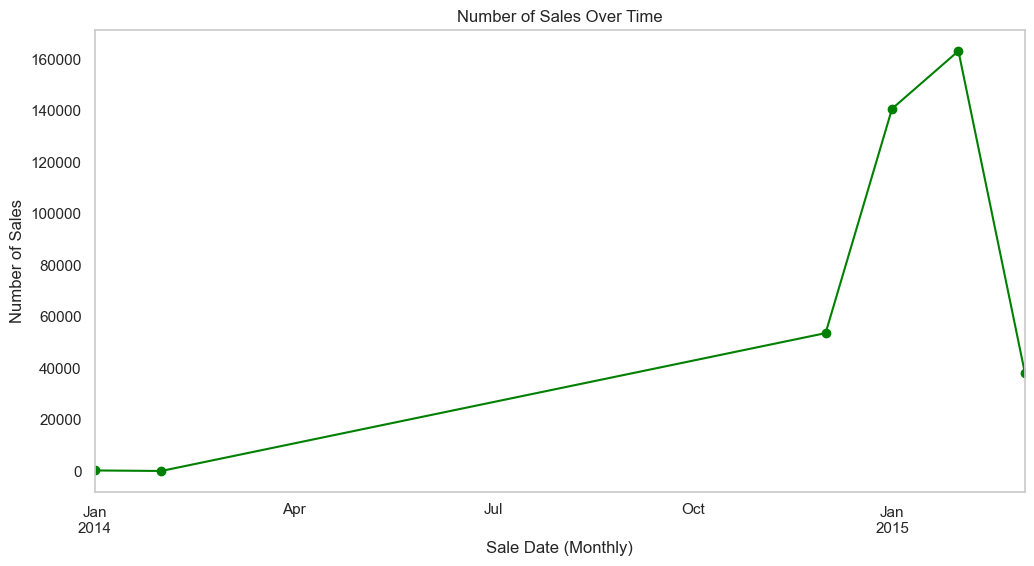

In [36]:
sales_over_time.plot(kind='line', figsize=(12, 6), marker='o', color='green')
plt.title('Number of Sales Over Time')
plt.xlabel('Sale Date (Monthly)')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()